In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/serial-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   label          3616 non-null   object 
 1   voltage        3616 non-null   float64
 2   amperage       3616 non-null   float64
 3   temp_sensor_0  3616 non-null   float64
 4   temp_sensor_1  3616 non-null   float64
 5   temp_sensor_2  3616 non-null   float64
 6   temp_sensor_3  3616 non-null   float64
 7   temp_sensor_4  3616 non-null   float64
 8   temp_sensor_5  3616 non-null   float64
dtypes: float64(8), object(1)
memory usage: 254.4+ KB


In [3]:
df_temps = df.iloc(axis=1)[3:]
df_temps.describe()

,temp_sensor_0,temp_sensor_1,temp_sensor_2,temp_sensor_3,temp_sensor_4,temp_sensor_5
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,42.896018,47.265141,33.031112,32.285951,52.635578,36.082481
std,7.977244,10.116782,2.908678,10.629687,13.334086,21.231303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.750000,42.750000,30.750000,28.000000,45.500000,32.500000
50%,43.500000,48.750000,33.250000,34.500000,53.250000,35.750000
75%,49.750000,55.500000,35.250000,40.500000,63.500000,38.250000
max,54.250000,60.500000,38.750000,73.000000,72.500000,1023.750000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'temp_sensor_0'),
  Text(1, 0, 'temp_sensor_1'),
  Text(2, 0, 'temp_sensor_2'),
  Text(3, 0, 'temp_sensor_3'),
  Text(4, 0, 'temp_sensor_4'),
  Text(5, 0, 'temp_sensor_5')])

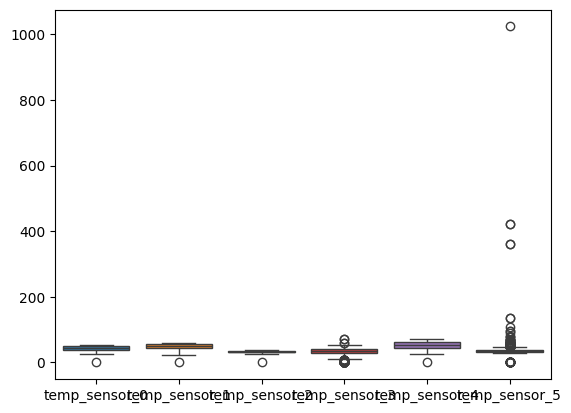

In [4]:
sns.boxplot(df_temps)
plt.xticks(fontsize=10)

In [5]:
df_temps = df_temps.mask(df_temps > 100, np.nan)
df_temps.ffill()

df_temps.describe()

,temp_sensor_0,temp_sensor_1,temp_sensor_2,temp_sensor_3,temp_sensor_4,temp_sensor_5
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3608.000000
mean,42.896018,47.265141,33.031112,32.285951,52.635578,35.339939
std,7.977244,10.116782,2.908678,10.629687,13.334086,5.763767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.750000,42.750000,30.750000,28.000000,45.500000,32.500000
50%,43.500000,48.750000,33.250000,34.500000,53.250000,35.750000
75%,49.750000,55.500000,35.250000,40.500000,63.500000,38.250000
max,54.250000,60.500000,38.750000,73.000000,72.500000,96.000000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'temp_sensor_0'),
  Text(1, 0, 'temp_sensor_1'),
  Text(2, 0, 'temp_sensor_2'),
  Text(3, 0, 'temp_sensor_3'),
  Text(4, 0, 'temp_sensor_4'),
  Text(5, 0, 'temp_sensor_5')])

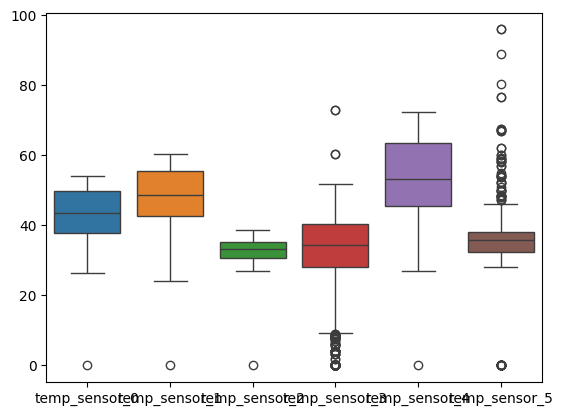

In [6]:
sns.boxplot(df_temps)
plt.xticks(fontsize=10)

In [7]:
# Lista de columnas a limpiar (las de tu gráfico)
columnas_sensores = df_temps.columns.values

for col in columnas_sensores:
    # 1. Calcular Q1, Q3, e IQR
    Q1 = df_temps[col].quantile(0.25)
    Q3 = df_temps[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Calcular límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # 3. Elegir tu método de limpieza (aquí usaré la Opción 2: Reemplazar con NaN)
    df_temps.loc[df_temps[col] < limite_inferior, col] = np.nan
    df_temps.loc[df_temps[col] > limite_superior, col] = np.nan

    df_temps.ffill()

In [8]:
df_temps

,temp_sensor_0,temp_sensor_1,temp_sensor_2,temp_sensor_3,temp_sensor_4,temp_sensor_5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,27.00,25.00,28.00,28.25,28.00,29.00
2,27.75,24.50,28.00,28.25,28.25,29.50
3,27.75,24.50,28.00,28.25,28.25,29.50
4,27.25,24.75,28.00,28.00,27.75,29.25
...,...,...,...,...,...,...
3611,36.75,42.50,30.25,32.50,45.00,32.00
3612,36.75,42.00,30.25,32.75,45.50,32.00
3613,36.75,42.00,30.25,32.75,45.50,32.00
3614,36.75,41.75,30.25,33.25,45.00,32.00


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'temp_sensor_0'),
  Text(1, 0, 'temp_sensor_1'),
  Text(2, 0, 'temp_sensor_2'),
  Text(3, 0, 'temp_sensor_3'),
  Text(4, 0, 'temp_sensor_4'),
  Text(5, 0, 'temp_sensor_5')])

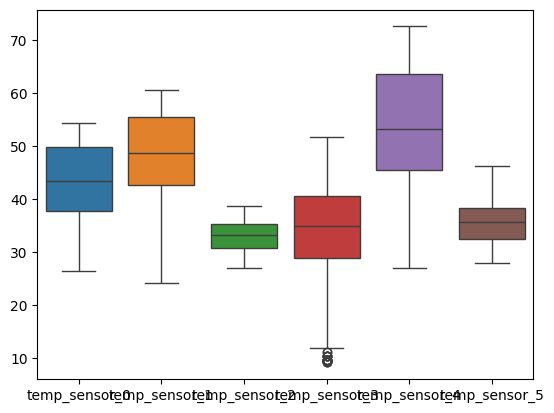

In [9]:
sns.boxplot(df_temps)
plt.xticks(fontsize=10)

In [10]:
df_temps.describe()

,temp_sensor_0,temp_sensor_1,temp_sensor_2,temp_sensor_3,temp_sensor_4,temp_sensor_5
count,3615.000000,3615.000000,3615.000000,3463.000000,3615.000000,3526.000000
mean,42.907884,47.278216,33.040249,33.540644,52.650138,35.277652
std,7.946366,10.087580,2.856706,8.692924,13.307150,3.659203
min,26.500000,24.250000,27.000000,9.250000,27.000000,28.000000
25%,37.750000,42.750000,30.750000,29.000000,45.500000,32.500000
50%,43.500000,48.750000,33.250000,35.000000,53.250000,35.750000
75%,49.750000,55.500000,35.250000,40.625000,63.500000,38.250000
max,54.250000,60.500000,38.750000,51.750000,72.500000,46.250000


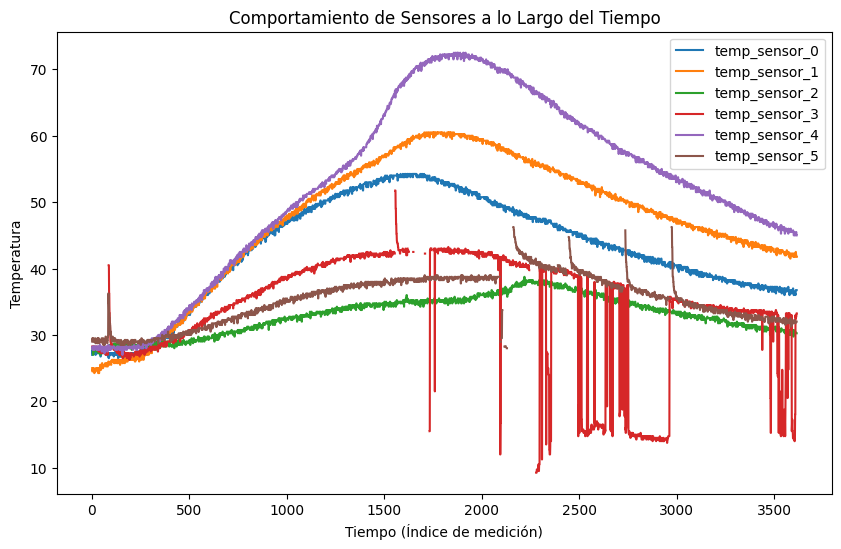

In [11]:
df_temps.plot(figsize=(10, 6))

# Añadimos títulos
plt.title("Comportamiento de Sensores a lo Largo del Tiempo")
plt.xlabel("Tiempo (Índice de medición)")
plt.ylabel("Temperatura")

plt.show()

In [12]:
df_ev = df.iloc(axis=1)[:3].copy()

df_ev.describe()

,voltage,amperage
count,3616.000000,3616.000000
mean,8.082359,11.546227
std,4.158816,5.941165
min,0.000000,0.000000
25%,6.160000,8.800000
50%,6.660000,9.514286
75%,12.622500,18.032143
max,15.680000,22.400000


([0, 1], [Text(0, 0, 'voltage'), Text(1, 0, 'amperage')])

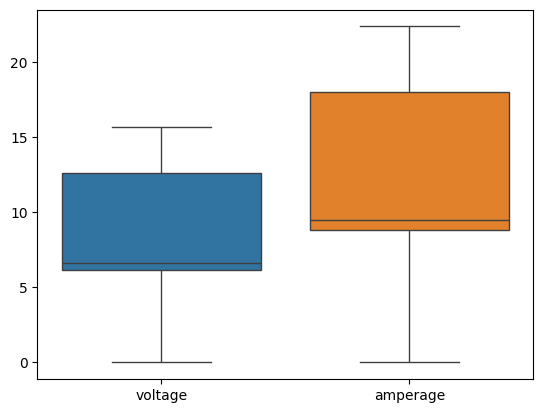

In [13]:
sns.boxplot(df_ev)
plt.xticks(fontsize=10)

<Axes: >

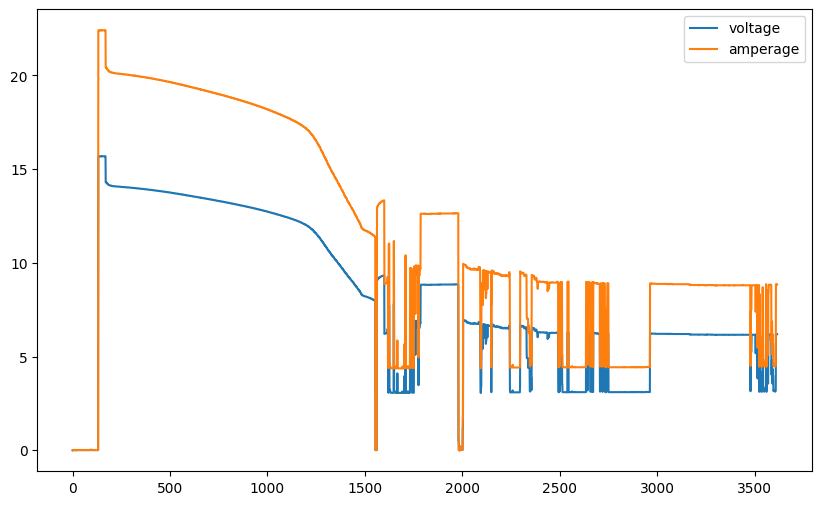

In [14]:
df_ev.plot(figsize=(10, 6))

<Axes: xlabel='voltage', ylabel='temp_sensor_0'>

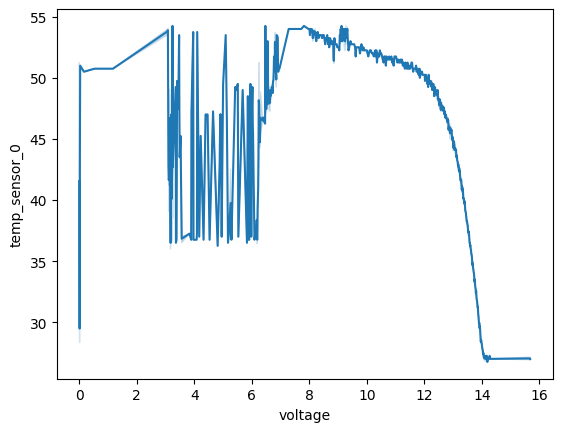

In [15]:
sns.lineplot(x=df_ev["voltage"], y=df_temps["temp_sensor_0"])

<Axes: xlabel='amperage', ylabel='temp_sensor_0'>

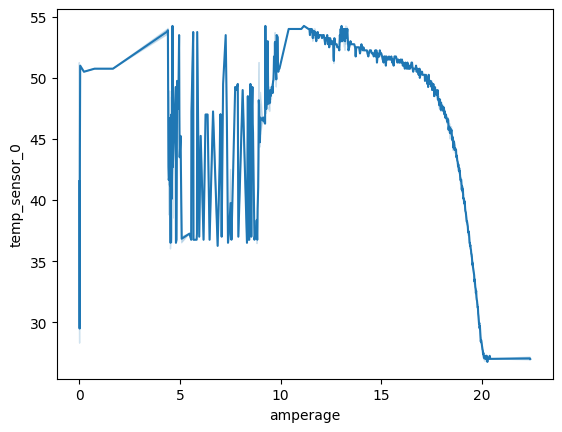

In [16]:
sns.lineplot(x=df_ev["amperage"], y=df_temps["temp_sensor_0"])
